# بخش دوم

در این قسمت توابع مورد نیاز که در بخش اول نوشته شدند در ابتدای مسیر اضافه میکنیم

In [1]:
import numpy
import random
from copy import deepcopy
import cv2
from skimage.util import random_noise
import matplotlib.pyplot as plt

In [2]:
def ApplySaltAndPepper(img , upBound:int , minBound:int = 300):
    image = deepcopy(img)
    col = len(image[0])
    row = len(image)

    numberOfPixels = random.randint(minBound , upBound)

    for num in range(numberOfPixels):
        x = random.randint(0 , col - 1)
        y = random.randint(0 , row - 1)

        image[x , y] = 0
    
    numberOfPixels = random.randint(300 , upBound)

    for num in range(numberOfPixels):
        x = random.randint(0 , col - 1)
        y = random.randint(0 , row - 1)

        image[x , y] = 255
    

    return image

In [3]:
def ApplyGuassianNoise(img) :
    image =  random_noise(img , mode='gaussian', seed=None, clip=True)
    return numpy.float32(image)

In [4]:
def ApplyGaussianFilter(size:int , img):
    image = cv2.GaussianBlur(img , (size , size) , 0)

    return image

In [5]:
def ApplyMeanFilter(size:int , img):
    filter =  numpy.ones((size,size),numpy.float32)/(size ** 2)
    image = deepcopy(img)
    image = cv2.filter2D(image , -1 , filter)

    return image

In [6]:
def ApplyMedianFilter(size:int , img):
   image = cv2.medianBlur(img , size)
   return image

حال توابع مربوط به نگاشت لگاریتمی و لگاریتمی معکوس یا همان نمایی را تعریف میکنیم

In [7]:
def LogarithmicMapping(img):
    mapped = 20 * numpy.log((img.astype(numpy.float64) + 1))
    
    return mapped.astype(numpy.float32 , copy=False)

In [8]:
def inverseLogaritmic(img):
    mapped = numpy.exp(img / 20) - 1
    
    return mapped

حال در این قسمت ابتدا تصاویر را میخوانیم و سپس نویز ها را رو آن اعمال میکنیم. بعد از اعمال نویز ها با استفاده از تابع لگاریتمی آن را نگاشت میدهیم و پس از این کار با اعمال فیلتر ها و انجام تبدیل لگاریتمی معکوس، آن را نمایش میدهیم و نحوه تاثیر این نگاشت را بر روی نتیجه نویز ها بررسی میکنیم

ابتدا به سراغ تصویر cameraman و نویز گوسی میرویم.

Text(0.5, 1.0, 'median 5 * 5')

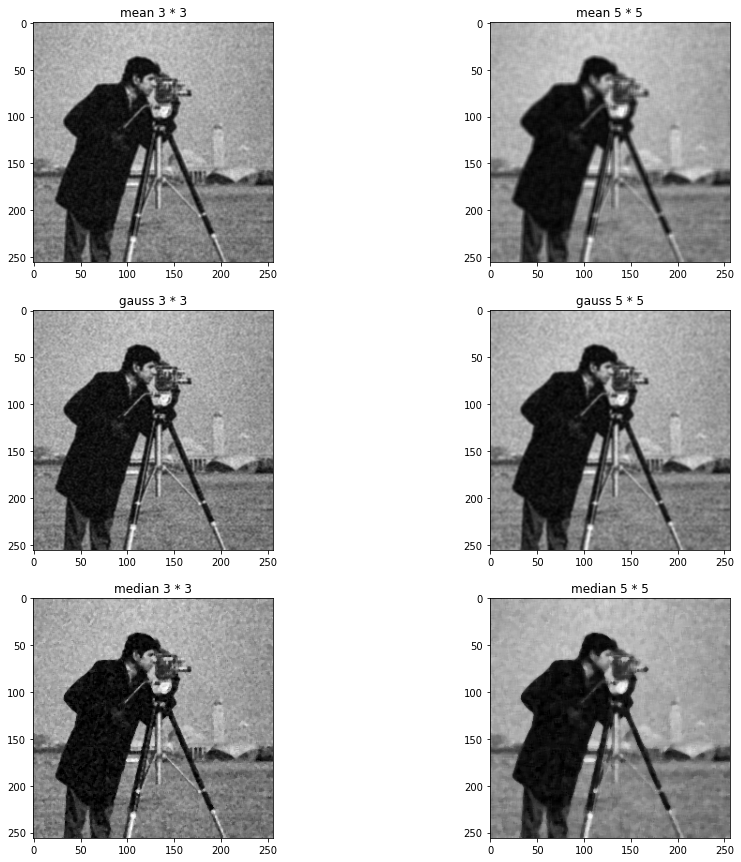

In [9]:
# Reading image and appling gaussian noise
cameramanImage = cv2.imread("../cameraman.tif" , cv2.IMREAD_GRAYSCALE)
gaussCameraman = ApplyGuassianNoise(cameramanImage)

# logaritmic mapping
logaritmicGaussCameraman = LogarithmicMapping(gaussCameraman)

# appling filters
blur3gaussCameraMan = ApplyMeanFilter(3 , logaritmicGaussCameraman)
blur5gaussCameraMan = ApplyMeanFilter(5 , logaritmicGaussCameraman)
blur3GaussianMan = ApplyGaussianFilter(3 , logaritmicGaussCameraman)
blur5GaussianMan = ApplyGaussianFilter(5 , logaritmicGaussCameraman)
blur3MedianCameraMan = ApplyMedianFilter(3 , logaritmicGaussCameraman)
blure5MedianCameraMan = ApplyMedianFilter(5 , logaritmicGaussCameraman)

# inversing the logaritmic mapping
inversebLoglur3gaussCameraMan = inverseLogaritmic(blur3gaussCameraMan)
inverseblur5gaussCameraMan = inverseLogaritmic(blur5gaussCameraMan)
inverseblur3GaussianMan = inverseLogaritmic(blur3GaussianMan)
inverseblur5GaussianMan = inverseLogaritmic(blur5GaussianMan)
inverseblur3MedianCameraMan = inverseLogaritmic(blur3MedianCameraMan)
inverseblure5MedianCameraMan = inverseLogaritmic(blure5MedianCameraMan)

# showing images
fig , subplot = plt.subplots(3 , 2 , figsize=(15, 15))
subplot[0][0].imshow(inversebLoglur3gaussCameraMan , cmap="gray")
subplot[0][0].set_title("mean 3 * 3")

subplot[0][1].imshow(inverseblur5gaussCameraMan , cmap="gray")
subplot[0][1].set_title("mean 5 * 5")

subplot[1][0].imshow(inverseblur3GaussianMan , cmap="gray")
subplot[1][0].set_title("gauss 3 * 3")

subplot[1][1].imshow(inverseblur5GaussianMan , cmap="gray")
subplot[1][1].set_title("gauss 5 * 5")

subplot[2][0].imshow(inverseblur3MedianCameraMan , cmap="gray")
subplot[2][0].set_title("median 3 * 3")

subplot[2][1].imshow(inverseblure5MedianCameraMan , cmap="gray")
subplot[2][1].set_title("median 5 * 5")


در این مرحله به سراغ نویز فلفل نمک و تصویر cameraman میرویم

Text(0.5, 1.0, 'median 5 * 5')

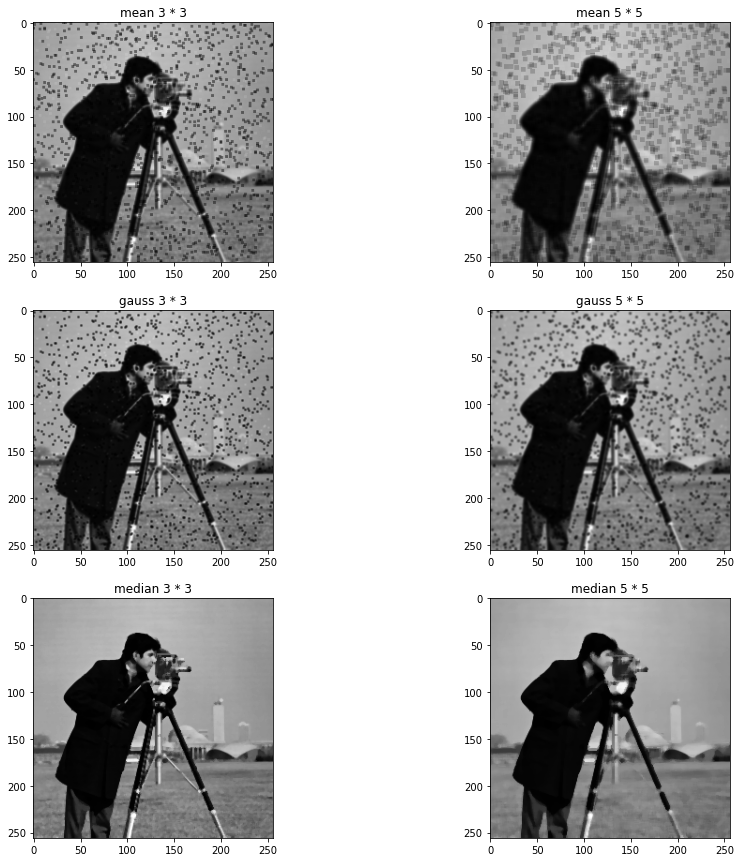

In [10]:
# Reading image and appling gaussian noise
saltAndPaperCameraman = ApplySaltAndPepper(cameramanImage , 1500)

# logaritmic mapping
logaritmicsaltAndPaperCameraman = LogarithmicMapping(saltAndPaperCameraman)

# appling filters
blur3saltAndPaperCameraMan = ApplyMeanFilter(3 , logaritmicsaltAndPaperCameraman)
blur5saltAndPaperCameraMan = ApplyMeanFilter(5 , logaritmicsaltAndPaperCameraman)
blur3saltAndPaperMan = ApplyGaussianFilter(3 , logaritmicsaltAndPaperCameraman)
blur5saltAndPaperMan = ApplyGaussianFilter(5 , logaritmicsaltAndPaperCameraman)
blur3MedianCameraMan = ApplyMedianFilter(3 , logaritmicsaltAndPaperCameraman)
blure5MedianCameraMan = ApplyMedianFilter(5 , logaritmicsaltAndPaperCameraman)

# inversing the logaritmic mapping
inversebLoglur3saltAndPaperCameraMan = inverseLogaritmic(blur3saltAndPaperCameraMan)
inverseblur5saltAndPaperCameraMan = inverseLogaritmic(blur5saltAndPaperCameraMan)
inverseblur3saltAndPaperMan = inverseLogaritmic(blur3saltAndPaperMan)
inverseblur5saltAndPaperMan = inverseLogaritmic(blur5saltAndPaperMan)
inverseblur3MedianCameraMan = inverseLogaritmic(blur3MedianCameraMan)
inverseblure5MedianCameraMan = inverseLogaritmic(blure5MedianCameraMan)

# showing images
fig , subplot = plt.subplots(3 , 2 , figsize=(15, 15))
subplot[0][0].imshow(inversebLoglur3saltAndPaperCameraMan , cmap="gray")
subplot[0][0].set_title("mean 3 * 3")

subplot[0][1].imshow(inverseblur5saltAndPaperCameraMan , cmap="gray")
subplot[0][1].set_title("mean 5 * 5")

subplot[1][0].imshow(inverseblur3saltAndPaperMan , cmap="gray")
subplot[1][0].set_title("gauss 3 * 3")

subplot[1][1].imshow(inverseblur5saltAndPaperMan , cmap="gray")
subplot[1][1].set_title("gauss 5 * 5")

subplot[2][0].imshow(inverseblur3MedianCameraMan , cmap="gray")
subplot[2][0].set_title("median 3 * 3")

subplot[2][1].imshow(inverseblure5MedianCameraMan , cmap="gray")
subplot[2][1].set_title("median 5 * 5")

حال به سراغ تصویر بابون و نویز گوسی میرویم، دلیل اینکه تصویر را بدون رنگ لود کردم این بود که کار کردن با تصویر رنگی مشکل داشت.

Text(0.5, 1.0, 'median 5 * 5')

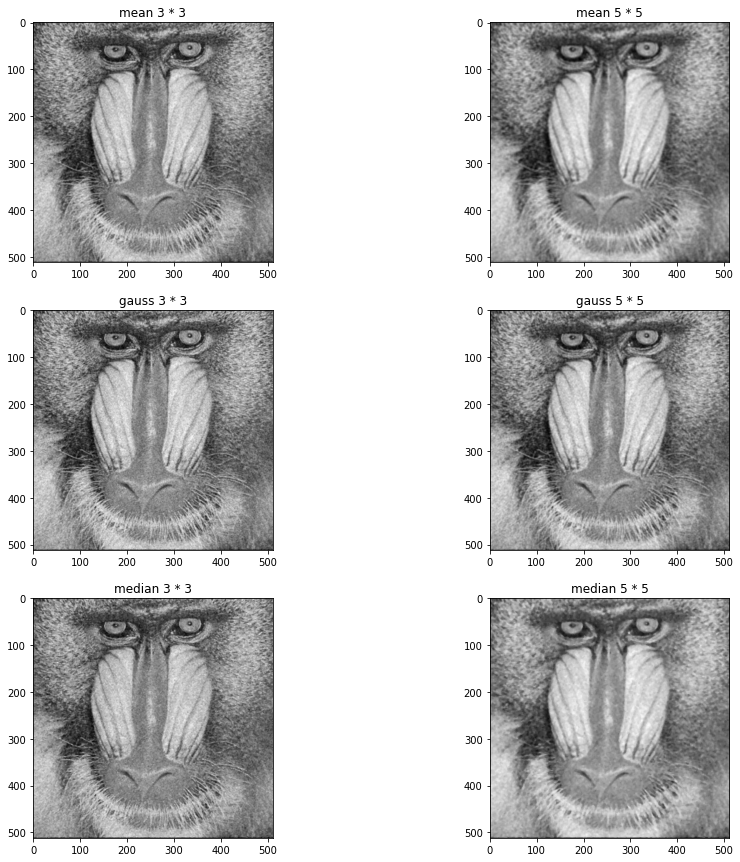

In [13]:
# Reading image and appling gaussian noise
babonImage = cv2.imread("../mandril.tiff" , cv2.IMREAD_GRAYSCALE)
gaussbabon = ApplyGuassianNoise(babonImage)

# logaritmic mapping
logaritmicgaussbabon = LogarithmicMapping(gaussbabon)

# appling filters
blur3Meangaussbabon = ApplyMeanFilter(3 , logaritmicgaussbabon)
blur5Meangaussbabon = ApplyMeanFilter(5 , logaritmicgaussbabon)
blur3GaussBabon = ApplyGaussianFilter(3 , logaritmicgaussbabon)
blur5GaussBabon = ApplyGaussianFilter(5 , logaritmicgaussbabon)
blur3MedianGaussBabon = ApplyMedianFilter(3 , logaritmicgaussbabon)
blure5MedianGaussBabon = ApplyMedianFilter(5 , logaritmicgaussbabon)

# inversing the logaritmic mapping
inverseblur3Meangaussbabon = inverseLogaritmic(blur3Meangaussbabon)
inverseblur5Meangaussbabon = inverseLogaritmic(blur5Meangaussbabon)
inverseblur3GaussBabon = inverseLogaritmic(blur3GaussBabon)
inverseblur5GaussBabon = inverseLogaritmic(blur5GaussBabon)
inverseblur3MedianGaussBabon = inverseLogaritmic(blur3MedianGaussBabon)
inverseblure5MedianGaussBabon = inverseLogaritmic(blure5MedianGaussBabon)

# showing images
fig , subplot = plt.subplots(3 , 2 , figsize=(15, 15))
subplot[0][0].imshow(inverseblur3Meangaussbabon , cmap="gray")
subplot[0][0].set_title("mean 3 * 3")

subplot[0][1].imshow(inverseblur5Meangaussbabon , cmap="gray")
subplot[0][1].set_title("mean 5 * 5")

subplot[1][0].imshow(inverseblur3GaussBabon , cmap="gray")
subplot[1][0].set_title("gauss 3 * 3")

subplot[1][1].imshow(inverseblur5GaussBabon , cmap="gray")
subplot[1][1].set_title("gauss 5 * 5")

subplot[2][0].imshow(inverseblur3MedianGaussBabon , cmap="gray")
subplot[2][0].set_title("median 3 * 3")

subplot[2][1].imshow(inverseblure5MedianGaussBabon , cmap="gray")
subplot[2][1].set_title("median 5 * 5")

حال به سراغ تصویر بابون با نویز فلفل نمک میرویم

Text(0.5, 1.0, 'median 5 * 5')

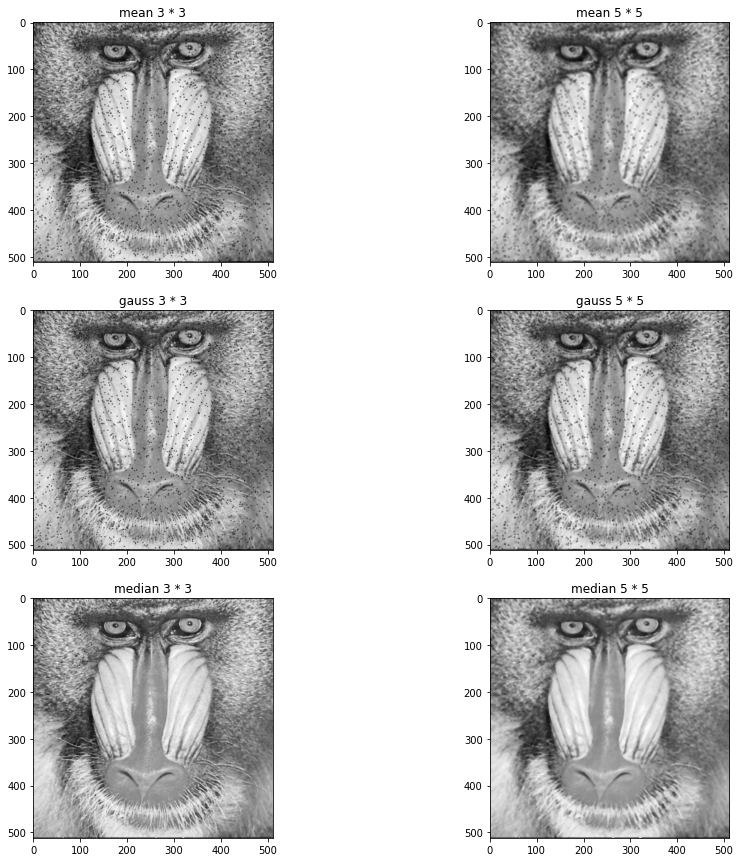

In [15]:
saltAndPaperbabon = ApplySaltAndPepper(babonImage , 3000 , 1500)

# logaritmic mapping
logaritmicsaltAndPaperbabon = LogarithmicMapping(saltAndPaperbabon)

# appling filters
blur3MeansaltAndPaperbabon = ApplyMeanFilter(3 , logaritmicsaltAndPaperbabon)
blur5MeansaltAndPaperbabon = ApplyMeanFilter(5 , logaritmicsaltAndPaperbabon)
blur3saltAndPaperbabon = ApplyGaussianFilter(3 , logaritmicsaltAndPaperbabon)
blur5saltAndPaperbabon = ApplyGaussianFilter(5 , logaritmicsaltAndPaperbabon)
blur3MediansaltAndPaperbabon = ApplyMedianFilter(3 , logaritmicsaltAndPaperbabon)
blure5MediansaltAndPaperbabon = ApplyMedianFilter(5 , logaritmicsaltAndPaperbabon)

# inversing the logaritmic mapping
inverseblur3MeansaltAndPaperbabon = inverseLogaritmic(blur3MeansaltAndPaperbabon)
inverseblur5MeansaltAndPaperbabon = inverseLogaritmic(blur5MeansaltAndPaperbabon)
inverseblur3saltAndPaperbabon = inverseLogaritmic(blur3saltAndPaperbabon)
inverseblur5saltAndPaperbabon = inverseLogaritmic(blur5saltAndPaperbabon)
inverseblur3MediansaltAndPaperbabon = inverseLogaritmic(blur3MediansaltAndPaperbabon)
inverseblure5MediansaltAndPaperbabon = inverseLogaritmic(blure5MediansaltAndPaperbabon)

# showing images
fig , subplot = plt.subplots(3 , 2 , figsize=(15, 15))
subplot[0][0].imshow(inverseblur3MeansaltAndPaperbabon , cmap="gray")
subplot[0][0].set_title("mean 3 * 3")

subplot[0][1].imshow(inverseblur5MeansaltAndPaperbabon , cmap="gray")
subplot[0][1].set_title("mean 5 * 5")

subplot[1][0].imshow(inverseblur3saltAndPaperbabon , cmap="gray")
subplot[1][0].set_title("gauss 3 * 3")

subplot[1][1].imshow(inverseblur5saltAndPaperbabon , cmap="gray")
subplot[1][1].set_title("gauss 5 * 5")

subplot[2][0].imshow(inverseblur3MediansaltAndPaperbabon , cmap="gray")
subplot[2][0].set_title("median 3 * 3")

subplot[2][1].imshow(inverseblure5MediansaltAndPaperbabon , cmap="gray")
subplot[2][1].set_title("median 5 * 5")

# نتیجه گیری

همانطور که مشاهده کردیم تاثیر نگاشت تابع های لگاریتمی در تصاویر و نویز های گوسی زیاد مشهود نیست و با نمونه اعمال فیلتر ها بدون این نگاشت ها زیاد تفاوتی نمیکند. اما در مورد نویز ها salt and paper با مقایسه نتایج این تصاویر که قبل از اعمال فیلتر ها با تابع لگاریتمی نگاشت شده اند و تصاویری که بدون نگاشت تابع لگاریتمی فیلتر شده اند، متوجه میشویم که در نمونه های نگاشت شده، نویز های مورد نظر بعد از اعمال فیلتر های گوسی و mean نسبت به نمونه هایی که نگاشت نشده اند دارای حجم محو شدگی کمتری هستند و عملا شاید بتوان گفت که اثر آن ها بیشتر هم شده است همانند تصاویری از cameraman و babon که بعد از اعمال فیلتر های گوسی و mean بر روی نویز salt and paper هنوز اینگونه نویز ها دارای اثر بالایی در تصویر هستند. پس شاید بتوان نتیجه گرفت توابع لگاریتمی اثر مخربی بر روی تصاویر دارای نویز های به سبک salt and paper دارند. با این حال فیلتر median بازهم به طور کامل بر روی اینگونه نویز ها موثر عمل کرده است. 